## Meghanjali Chennupati
##  U30308400
## In this assignment i will train my auto encoder to recontruct the image of my first letter.
1. Create 5 28x28 pixel images of the first letter of your first name to be used for training. For instance, if the first character of your name is K, then create 5 versions of K and save these as 5 different 28x28 images.

NOTE: You can do this using any drawing/photo software. Write your notes with a mouse.  (one example site is https://kleki.com/Links to an external site.. You can specify the image size as 28x28, set the background to black, and then the pen color to white and draw your letter). You can download this image as png file -- or use any image/drawing program you are familiar with). 

2. Create a notebook. Load the MNIST dataset (see the tutorial from class) and the supplied autencoder (digits.a5). Display the predictions for several random digits and compare these to the original. 

3. Create a new autoencoder, and train this autoencoder with the MNIST dataset, with your new images added (don't forget to oversample these images. Add enough copies to the MNIST dataset so that your model can identify your new character).

4. Demonstrate your new encoding by showing the autencoder recreate a random set of digits and your new character.

The exercise is relatively easy if you understand the material in the in-class tutorial on autoencoders - so be sure you spend time reviewing the tutorial (try experimenting with it, get to know how things work). This exercise will challenge you to do so.

Upload the following files:

* Your 5 images 

* Your notebook

* A saved version of your trained autoencoder 

# Load the required libraries

In [56]:
import numpy as np
from tensorflow import keras

# Load and normalize the data

In [57]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


# Checking the test images and displaying in image format

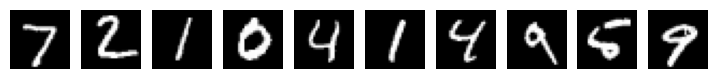

In [58]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

# Create an auto encoder model

In [59]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 16 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 500)               392500    
                                                                 
 dense_9 (Dense)             (None, 300)               150300    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 16)                1616      
                                                                 
 dense_12 (Dense)            (None, 100)               1700      
                                                                 
 dense_13 (Dense)            (None, 300)               30300     
                                                                 
 dense_14 (Dense)            (None, 500)              

# Train the autoencoder model

In [60]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 21s 40ms/step - loss: 0.1900 - val_loss: 0.1354
Epoch 2/10
469/469 [==============================] - 17s 36ms/step - loss: 0.1269 - val_loss: 0.1183
Epoch 3/10
469/469 [==============================] - 18s 39ms/step - loss: 0.1153 - val_loss: 0.1110
Epoch 4/10
469/469 [==============================] - 20s 42ms/step - loss: 0.1097 - val_loss: 0.1069
Epoch 5/10
469/469 [==============================] - 17s 37ms/step - loss: 0.1058 - val_loss: 0.1040
Epoch 6/10
469/469 [==============================] - 19s 41ms/step - loss: 0.1031 - val_loss: 0.1019
Epoch 7/10
469/469 [==============================] - 18s 39ms/step - loss: 0.1010 - val_loss: 0.1001
Epoch 8/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0992 - val_loss: 0.0986
Epoch 9/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0975 - val_loss: 0.0967
Epoch 10/10
469/469 [==============================] - 18s 38ms/step - loss: 0.096

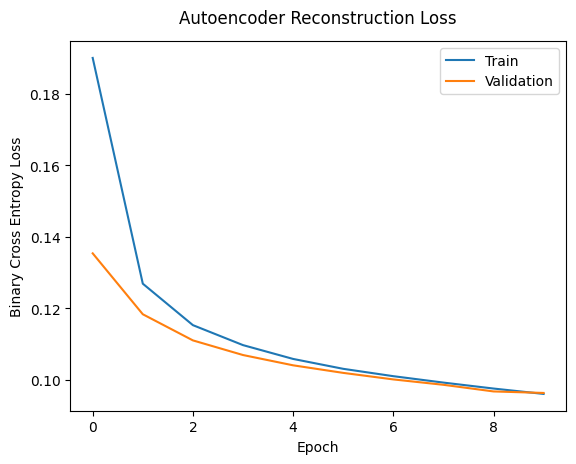

In [61]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

#Test the autoencoder model by reconstructing the test images and visually inspecting the results.

313/313 [==============================] - 1s 4ms/step


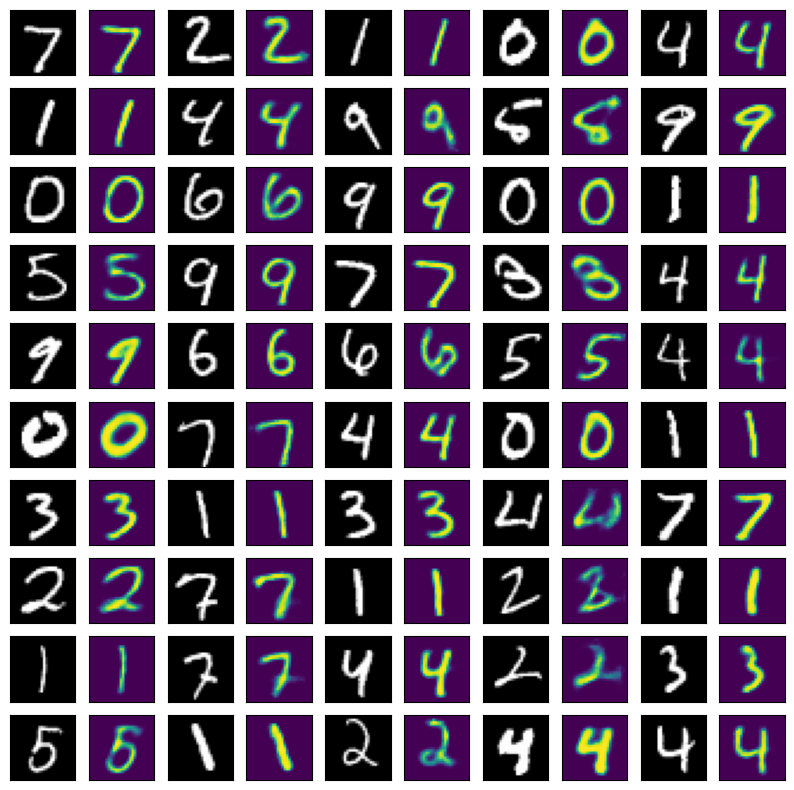

In [62]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

# Save the autoencoder for later user.

In [63]:
autoencoder.save('initially_trained_autoencoder1.h5')

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 [==============================] - 0s 24ms/step
(1, 784)


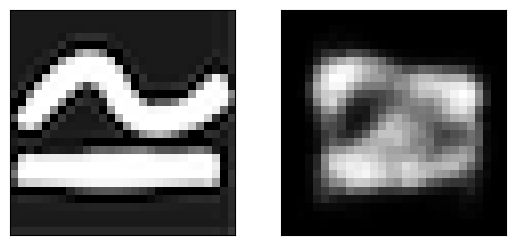

In [65]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Autoencoders/testimg02.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = autoencoder.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


1/1 [==============================] - 0s 30ms/step
(1, 784)


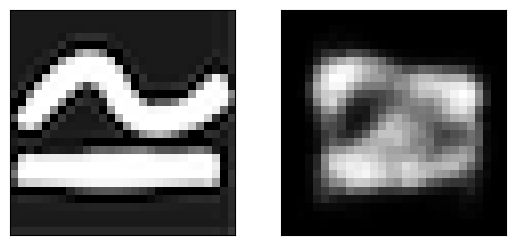

In [66]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Autoencoders/testimg01.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = autoencoder.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# Testing the auto encoder model with my new image of my first letter version 1image

1/1 [==============================] - 0s 34ms/step
(1, 784)


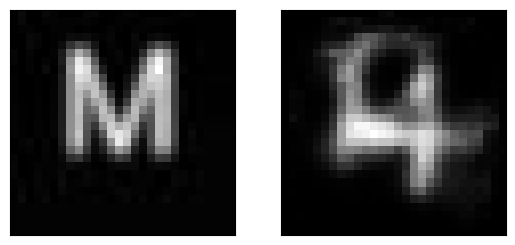

In [67]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Autoencoders/Media1.jpg', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = autoencoder.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


#Testing the auto encoder model with my new image of my first letter version 2image

1/1 [==============================] - 0s 29ms/step
(1, 784)


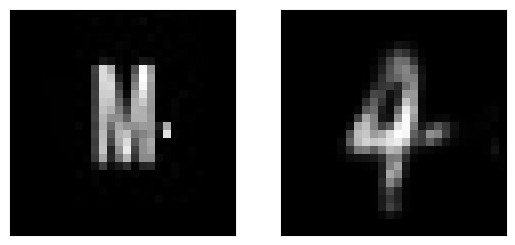

In [68]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Autoencoders/Media2.jpg', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = autoencoder.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# Testing the auto encoder model with my new image of my first letter version 3image

1/1 [==============================] - 0s 27ms/step
(1, 784)


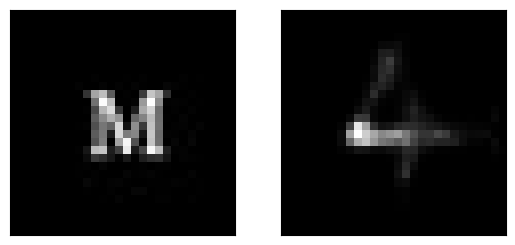

In [69]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Autoencoders/Media3.jpg', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = autoencoder.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# Testing the auto encoder model with my new image of my first letter version 4image

1/1 [==============================] - 0s 23ms/step
(1, 784)


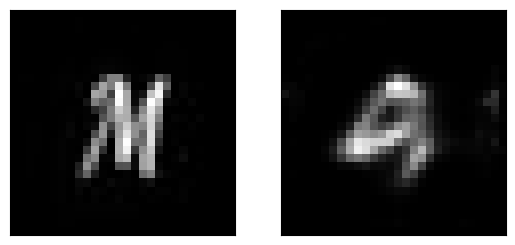

In [70]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Autoencoders/Media4.jpg', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = autoencoder.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# Testing the auto encoder model with my new image of my first letter version 5image

1/1 [==============================] - 0s 25ms/step
(1, 784)


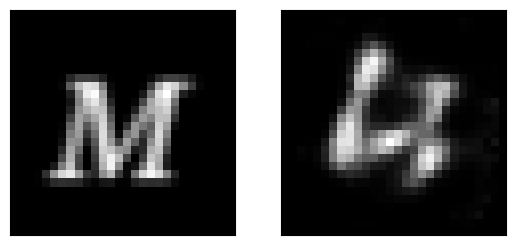

In [72]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('/content/drive/MyDrive/Autoencoders/Media5.jpg', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = autoencoder.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


# Analysis till here:

Till now we have did the following 

1. As per the question mentioned in the assignment I have created 5 verisons of the first letter of my name images of dimensions 28 * 28.

2. Then as per the secondpoint of the question I have loaded MNIST data set andtrained the auto encoder model and saved the traine model.
3. I also tested with the testimage provided by you and also my 5 images.

4. Since the auto encoder is not trained by this new 5 images it is not able to reconstruct it properly and it is detected as anomaly by our encoder model.

5. So, now i will create new encoder model and retrain with new images and see how it will able to reconstruct it

# Load my all 5 new symbol and test the autoencoder on this new symbol

In [73]:
pretrained_model = keras.models.load_model('/content/drive/MyDrive/Autoencoders/initially_trained_autoencoder.h5')

1/1 [==============================] - 0s 29ms/step


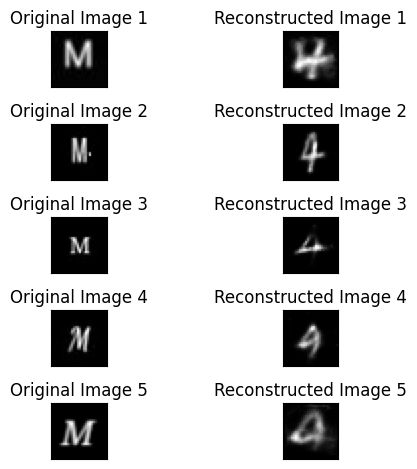

In [74]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np


# Define target image size and color mode
target_size = (28, 28)
color_mode = "grayscale"
new_images = []
# Load 5 new images and display their predictions
for i in range(1, 6):
    # Load image
    img_path = f"/content/drive/MyDrive/Autoencoders/Media{i}.jpg"
    img = image.load_img(img_path, target_size=target_size, color_mode=color_mode)

    # Convert image to array and normalize
    input_arr = image.img_to_array(img) / 255
    input_arr = input_arr.reshape(784)
    input_arr = np.array([input_arr])
    new_images.append(input_arr.reshape(784))

    # Get prediction
    predictions = pretrained_model.predict(input_arr)

    # Display original and reconstructed image
    plt.subplot(5, 2, 2*i-1)
    plt.imshow(img, cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(f"Original Image {i}")

    plt.subplot(5, 2, 2*i)
    plt.imshow(predictions[0].reshape(28,28), cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(f"Reconstructed Image {i}")

plt.tight_layout()
plt.show()


# Continue training the pretrained autoencoder with only the new symbol

In [75]:

new_images = np.array(new_images)

# Duplicate new images to match size of MNIST dataset
new_images = np.repeat(new_images, 200, axis=0)


In [76]:
new_images.shape

(1000, 784)

In [79]:
from tensorflow import keras
updated_model = keras.models.load_model('/content/drive/MyDrive/Autoencoders/initially_trained_autoencoder.h5')

from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = pretrained_model.fit(
    x=new_images, # For autoencoders, both the input and the target are the same
    y=new_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images, new_images),
    callbacks=[early_stop]
)

Epoch 1/10
8/8 [==============================] - 1s 70ms/step - loss: 0.1483 - val_loss: 0.1270
Epoch 2/10
8/8 [==============================] - 0s 44ms/step - loss: 0.1216 - val_loss: 0.1172
Epoch 3/10
8/8 [==============================] - 0s 43ms/step - loss: 0.1151 - val_loss: 0.1132
Epoch 4/10
8/8 [==============================] - 0s 45ms/step - loss: 0.1124 - val_loss: 0.1117
Epoch 5/10
8/8 [==============================] - 0s 44ms/step - loss: 0.1113 - val_loss: 0.1110
Epoch 6/10
8/8 [==============================] - 0s 47ms/step - loss: 0.1108 - val_loss: 0.1106
Epoch 7/10
8/8 [==============================] - 0s 46ms/step - loss: 0.1105 - val_loss: 0.1103
Epoch 8/10
8/8 [==============================] - 0s 46ms/step - loss: 0.1103 - val_loss: 0.1102
Epoch 9/10
8/8 [==============================] - 0s 47ms/step - loss: 0.1101 - val_loss: 0.1101
Epoch 10/10
8/8 [==============================] - 0s 44ms/step - loss: 0.1100 - val_loss: 0.1100


1/1 [==============================] - 0s 33ms/step


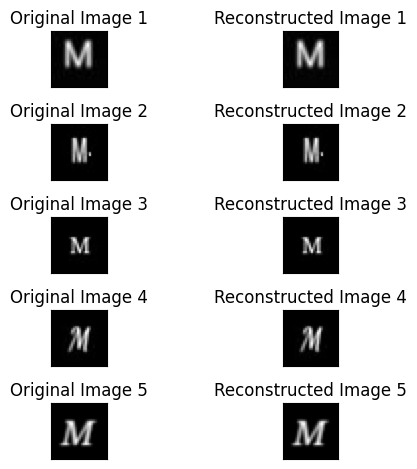

In [83]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np


# Define target image size and color mode
target_size = (28, 28)
color_mode = "grayscale"

# Load 5 new images and display their predictions
for i in range(1, 6):
    # Load image
    img_path = f"/content/drive/MyDrive/Autoencoders/Media{i}.jpg"
    img = image.load_img(img_path, target_size=target_size, color_mode=color_mode)

    # Convert image to array and normalize
    input_arr = image.img_to_array(img) / 255
    input_arr = input_arr.reshape(784)
    input_arr = np.array([input_arr])

    # Get prediction
    predictions = pretrained_model.predict(input_arr)

    # Display original and reconstructed image
    plt.subplot(5, 2, 2*i-1)
    plt.imshow(img, cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(f"Original Image {i}")

    plt.subplot(5, 2, 2*i)
    plt.imshow(predictions[0].reshape(28,28), cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(f"Reconstructed Image {i}")

plt.tight_layout()
plt.show()


# Recreating random set of digits with new character

In [84]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


313/313 [==============================] - 1s 5ms/step


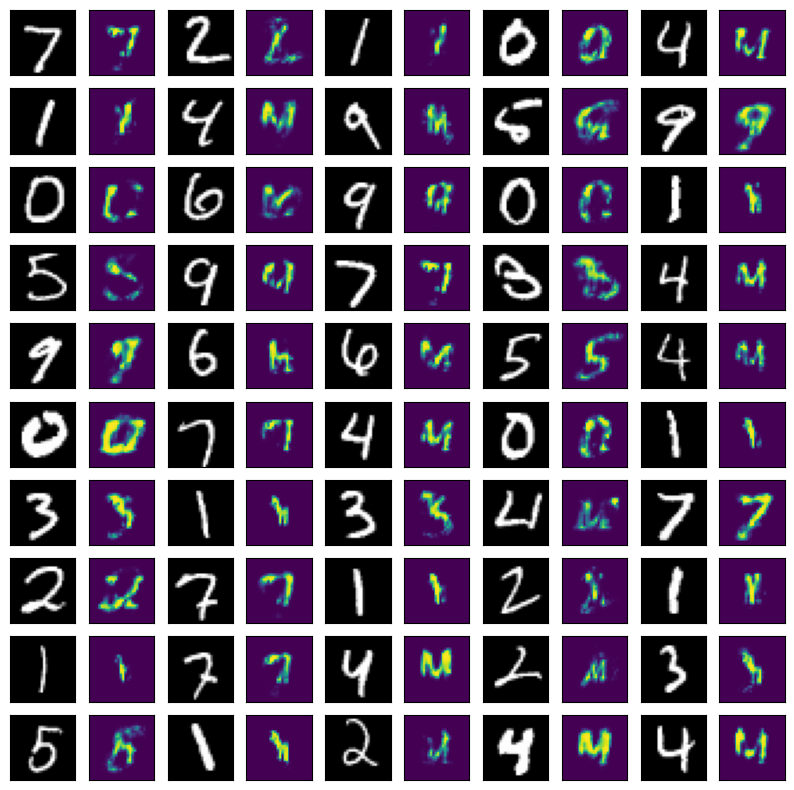

In [85]:
reconstructed_images = pretrained_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

In [90]:
# Saving my best autoencoder model

In [92]:
pretrained_model.save('/content/drive/MyDrive/Autoencoders/best_trained_autoencoder.h5')

# Analysis:
Firstly as per the question I loaded the mnist data set and supplied autoencoder and tested the several digits and my 5 images which i created.
Since my new symbols are not trained to my autoencoders it is not able to recognised them (autoencodermodel (variable name) (intially trained encoder).
Next I have trained my model with new 5 images and then tested the model.
Then it can able to recreate the digits more effciently . (pretrained_model)

In order to do that i have loaded the 5 images by using for loop and then normalized it and saved in to new_images.

with this new images i created and traiend new autoencoder and then tested the performance it is recreating well.

And as per the question i also reconstructed mnist data set with my new 5 images.
As per the question i also saved my best autoencoder model ie: pretrained_model